### 在线性模型中使用梯度下降法

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [10]:
X = x.reshape(-1,1)

In [11]:
X.shape

(100, 1)

In [12]:
y.shape

(100,)

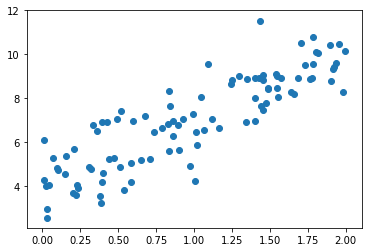

In [13]:
plt.scatter(x, y)
plt.show()

### 使用梯度下降法训练

In [14]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('info')

In [15]:
# 比较笨的方法
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return res * 2 / len(X_b)

In [17]:
def grandient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        i_iter += 1
    return theta

In [21]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1, 1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = grandient_descent(X_b, y, initial_theta, eta)

In [22]:
theta

array([4.02145786, 3.00706277])

### 使用sclearn中的用法

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
print(lin_reg.coef_, lin_reg.intercept_)   # 斜率项，截距项

[3.00517447] 4.023696672103901


### 线性回归中梯度下降法的向量化

#### （略）

### 梯度下降法的使用

In [25]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [26]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50]
y = y[y < 50]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [31]:
lin_reg = LinearRegression()
%time lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)       # R^2值

CPU times: user 2.04 ms, sys: 2.24 ms, total: 4.27 ms
Wall time: 69.9 ms


0.812979405621281

### 使用梯度下降法

##### 使用梯度下降法之前，需要进行归一化

In [32]:
# 归一化
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [37]:
lin_reg1 = LinearRegression()
%time lin_reg1.fit(X_train_standard, y_train)
lin_reg1.score(X_test_standard, y_test)       # R^2值

CPU times: user 2.23 ms, sys: 1.23 ms, total: 3.46 ms
Wall time: 2.37 ms


0.812979405621281

### 梯度下降法的优势

In [38]:
m = 1000
n = 5000

big_X = np.random.normal(size=(m, n))
true_theta = np.random.uniform(0.0, 100.0, size=n+1)
big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0.0, 10.0, size=m)

In [40]:
big_X

array([[ 0.78590233, -0.37198983,  1.01149733, ..., -0.86659114,
         0.75744366,  0.54266853],
       [ 0.73929397,  0.02601104,  1.69203408, ..., -1.08139844,
        -1.80240682,  0.95610147],
       [ 1.09269451,  0.31085962, -1.29742877, ...,  0.90913838,
        -0.11942534, -0.71057055],
       ...,
       [ 0.58011346,  0.55935947, -1.32682939, ...,  1.08871572,
         0.0654675 ,  0.61587814],
       [-1.20869571, -0.48719994,  0.81151086, ...,  0.29125527,
        -2.13518048, -0.65888082],
       [-0.08049257,  0.65943582, -0.93169313, ...,  0.04093854,
         0.71214974, -0.17355439]])

In [41]:
true_theta

array([88.5354643 , 47.47413697, 34.95880375, ..., 11.54532485,
       49.62815137,  2.87078592])

In [42]:
big_y

array([-9.78997831e+03,  1.40510558e+03, -6.02236028e+03, -1.00494560e+04,
       -2.47244392e+03,  3.37134775e+03,  3.32069805e+03,  5.26628455e+03,
       -2.87453008e+03, -3.46731260e+03,  1.24787535e+03,  2.50016873e+03,
        4.72036574e+03,  1.45753102e+03, -6.96981660e+03, -4.62880531e+02,
       -1.43025161e+03, -2.71159749e+03,  9.42336152e+02, -1.99815853e+02,
        8.25636058e+03, -3.87037488e+03,  5.81425365e+03, -4.25827426e+03,
        3.25848759e+03,  6.29906554e+03, -8.11321549e+03, -2.61497029e+03,
       -1.31959832e+03,  3.67161661e+03, -1.13388116e+03,  2.07232202e+03,
        4.00028546e+03, -9.60225388e+02, -1.29140874e+03,  2.89139935e+03,
        6.11073282e+02, -2.19841728e+03, -2.21151858e+03,  2.22412397e+03,
       -1.04463198e+03,  3.17578064e+03,  6.22346442e+03, -7.36047791e+03,
       -5.03451542e+03,  3.06551159e+02,  1.50992597e+03,  6.46281904e+01,
       -5.00554262e+03, -8.81280640e+01, -6.90771447e+03,  3.17116530e+03,
        5.17435745e+03, -

In [43]:
big_reg = LinearRegression()
%time big_reg.fit(big_X, big_y)

CPU times: user 14.7 s, sys: 273 ms, total: 15 s
Wall time: 13.8 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)